# Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorboard.plugins.hparams import api as hp

# Importing Train Dataset

In [2]:
train_datagen = ImageDataGenerator(rescale = 1./255)
training_set = train_datagen.flow_from_directory('C:/Users/HP/Desktop/Images/Train',
                                                 batch_size = 20,
                                                 target_size = (150,150),
                                                 class_mode = 'binary')

Found 247 images belonging to 2 classes.


In [4]:
training_set[0]

(array([[[[0.627451  , 0.61960787, 0.56078434],
          [0.6156863 , 0.60784316, 0.54901963],
          [0.63529414, 0.627451  , 0.5764706 ],
          ...,
          [0.6313726 , 0.60784316, 0.5529412 ],
          [0.7137255 , 0.6901961 , 0.59607846],
          [0.6901961 , 0.6666667 , 0.57254905]],
 
         [[0.62352943, 0.60784316, 0.50980395],
          [0.627451  , 0.61960787, 0.56078434],
          [0.61960787, 0.6117647 , 0.5529412 ],
          ...,
          [0.7294118 , 0.6862745 , 0.60784316],
          [0.6627451 , 0.654902  , 0.5568628 ],
          [0.64705884, 0.62352943, 0.5294118 ]],
 
         [[0.6509804 , 0.6431373 , 0.58431375],
          [0.627451  , 0.61960787, 0.5294118 ],
          [0.627451  , 0.61960787, 0.56078434],
          ...,
          [0.7176471 , 0.69411767, 0.6       ],
          [0.69803923, 0.6666667 , 0.5764706 ],
          [0.6392157 , 0.59607846, 0.50980395]],
 
         ...,
 
         [[0.79215693, 0.8000001 , 0.7176471 ],
          [0.77254

# Importing Validation Dataset

In [3]:
validate_datagen = ImageDataGenerator(rescale = 1./255)
validate_set = validate_datagen.flow_from_directory('C:/Users/HP/Desktop/Images/Validate',
                                                 batch_size = 20,
                                                 target_size = (150,150),
                                                 class_mode = 'binary')

Found 32 images belonging to 2 classes.


# Class Indices

In [4]:
validate_set.class_indices

{'No Pipes': 0, 'PVC Pipes': 1}

# HyperParameter Tuning of CNN Model using Tensorboard

In [5]:
HP_FILTER_SIZE = hp.HParam('filter_size',hp.Discrete([3,5,7]))
HP_FILTER_NUM = hp.HParam('filter_num',hp.Discrete([32,64,96]))

METRIC_ACCURACY = hp.Metric('accuracy',display_name='Accuracy')

with tf.summary.create_file_writer('C:/Users/HP/Desktop/Images/logs/hparam_tuning').as_default():
    hp.hparams_config(hparams=[HP_FILTER_SIZE,HP_FILTER_NUM],
                     metrics=[METRIC_ACCURACY])

In [6]:
def train_test_model(hparams):
    
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Conv2D(hparams[HP_FILTER_NUM],hparams[HP_FILTER_SIZE],activation='relu',input_shape=[150,150,3]))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
    model.add(tf.keras.layers.Conv2D(32,3,activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
    model.add(tf.keras.layers.Conv2D(32,3,activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(units = 256 , activation='relu'))
    model.add(tf.keras.layers.Dense(units = 256 , activation='relu'))
    model.add(tf.keras.layers.Dense(1,activation='sigmoid'))
    
    optimizer_fn = tf.keras.optimizers.Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer_fn,loss='binary_crossentropy',metrics=['accuracy'])

    
    Early_Stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                 mode='auto',
                                                 min_delta=0,
                                                 patience=3,
                                                 verbose=0,
                                                 restore_best_weights=True)
    
    model.fit(training_set,validation_data = validate_set, callbacks = [Early_Stopping], verbose = 2, epochs = 20)
    
    _,accuracy = model.evaluate(validate_set)
    
    return accuracy

In [7]:
def run(log_dir,hparams):
    with tf.summary.create_file_writer(log_dir).as_default():
        hp.hparams(hparams)
        accuracy = train_test_model(hparams)
        tf.summary.scalar('accuracy',accuracy,step=1)

In [8]:
session_num = 1

for filter_size in HP_FILTER_SIZE.domain.values:
    for filter_num in HP_FILTER_NUM.domain.values:
        
        hparams = {HP_FILTER_SIZE:filter_size,
                  HP_FILTER_NUM:filter_num}
        run_name = "run-%d" %session_num
        print('-- Starting-trail: %s' %run_name)
        print({h.name:hparams[h] for h in hparams})
        run('C:/Users/HP/Desktop/Images/logs/hparam_tuning/' + run_name, hparams)
        
        session_num = session_num + 1

-- Starting-trail: run-1
{'filter_size': 3, 'filter_num': 32}
Epoch 1/20
13/13 - 44s - loss: 0.7055 - accuracy: 0.4737 - val_loss: 0.6911 - val_accuracy: 0.5000
Epoch 2/20
13/13 - 41s - loss: 0.6914 - accuracy: 0.5304 - val_loss: 0.6914 - val_accuracy: 0.5000
Epoch 3/20
13/13 - 42s - loss: 0.6867 - accuracy: 0.5668 - val_loss: 0.6766 - val_accuracy: 0.5000
Epoch 4/20
13/13 - 43s - loss: 0.6894 - accuracy: 0.6032 - val_loss: 0.6745 - val_accuracy: 0.7500
Epoch 5/20
13/13 - 48s - loss: 0.6711 - accuracy: 0.6113 - val_loss: 0.6990 - val_accuracy: 0.5000
Epoch 6/20
13/13 - 45s - loss: 0.6715 - accuracy: 0.6194 - val_loss: 0.6430 - val_accuracy: 0.5000
Epoch 7/20
13/13 - 44s - loss: 0.6593 - accuracy: 0.5587 - val_loss: 0.5852 - val_accuracy: 0.8438
Epoch 8/20
13/13 - 38s - loss: 0.5861 - accuracy: 0.7004 - val_loss: 0.5508 - val_accuracy: 0.8750
Epoch 9/20
13/13 - 40s - loss: 0.5492 - accuracy: 0.7571 - val_loss: 0.4496 - val_accuracy: 0.8750
Epoch 10/20
13/13 - 39s - loss: 0.4803 - accura

Epoch 3/20
13/13 - 57s - loss: 0.6875 - accuracy: 0.5061 - val_loss: 0.6880 - val_accuracy: 0.5938
Epoch 4/20
13/13 - 48s - loss: 0.6791 - accuracy: 0.6356 - val_loss: 0.6499 - val_accuracy: 0.7500
Epoch 5/20
13/13 - 52s - loss: 0.6453 - accuracy: 0.6316 - val_loss: 0.6365 - val_accuracy: 0.7500
Epoch 6/20
13/13 - 55s - loss: 0.5957 - accuracy: 0.7166 - val_loss: 0.6552 - val_accuracy: 0.6250
Epoch 7/20
13/13 - 58s - loss: 0.4990 - accuracy: 0.7490 - val_loss: 1.0548 - val_accuracy: 0.5000
Epoch 8/20
13/13 - 50s - loss: 0.4479 - accuracy: 0.8340 - val_loss: 1.2727 - val_accuracy: 0.5000
2/2 [==============================] - 3s 1s/step - loss: 0.6365 - accuracy: 0.7500
-- Starting-trail: run-8
{'filter_size': 7, 'filter_num': 64}
Epoch 1/20
13/13 - 52s - loss: 0.7489 - accuracy: 0.5101 - val_loss: 0.7373 - val_accuracy: 0.5000
Epoch 2/20
13/13 - 56s - loss: 0.6983 - accuracy: 0.5223 - val_loss: 0.6925 - val_accuracy: 0.5000
Epoch 3/20
13/13 - 50s - loss: 0.6904 - accuracy: 0.5101 - val

# Result of HyperParameter Tuning

In [2]:
%load_ext tensorboard
%tensorboard --logdir "C:\\Users\\HP\\Desktop\\Images\\logs\\hparam_tuning\\"

In [ ]:
# taskkill /im tensorboard.exe /f
# del /q %TMP%\.tensorboard-info\*

# Creating the CNN Model for this Dataset

In [5]:
model_cnn = tf.keras.Sequential()

In [5]:
model_cnn = tf.keras.Sequential()
model_cnn.add(tf.keras.layers.Conv2D(64,5,activation='relu',input_shape=[150,150,3]))
model_cnn.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model_cnn.add(tf.keras.layers.Conv2D(32,3,activation='relu'))
model_cnn.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model_cnn.add(tf.keras.layers.Conv2D(32,3,activation='relu'))
model_cnn.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model_cnn.add(tf.keras.layers.Flatten())
model_cnn.add(tf.keras.layers.Dense(units = 256 , activation='relu'))
model_cnn.add(tf.keras.layers.Dense(units = 256 , activation='relu'))
model_cnn.add(tf.keras.layers.Dense(1, activation = 'sigmoid'))

optimizer_fn = tf.keras.optimizers.Adam(learning_rate=0.001)
model_cnn.compile(optimizer=optimizer_fn,loss='binary_crossentropy',metrics=['accuracy'])
    
Early_Stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                 mode='auto',
                                                 min_delta=0,
                                                 patience=3,
                                                 verbose=0,
                                                 restore_best_weights=True)
    
model_cnn.fit(training_set,validation_data = validate_set, callbacks = [Early_Stopping], verbose = 2, epochs = 50)
    
_,accuracy = model_cnn.evaluate(validate_set)
    
print(f'Accuracy based on Validation data is {accuracy*100:.2f}')

Epoch 1/20
13/13 - 64s - loss: 0.7144 - accuracy: 0.5061 - val_loss: 0.6941 - val_accuracy: 0.5000
Epoch 2/20
13/13 - 42s - loss: 0.6968 - accuracy: 0.4980 - val_loss: 0.6921 - val_accuracy: 0.5000
Epoch 3/20
13/13 - 41s - loss: 0.6943 - accuracy: 0.5020 - val_loss: 0.6908 - val_accuracy: 0.5000
Epoch 4/20
13/13 - 44s - loss: 0.6912 - accuracy: 0.5506 - val_loss: 0.6927 - val_accuracy: 0.5000
Epoch 5/20
13/13 - 43s - loss: 0.6943 - accuracy: 0.5668 - val_loss: 0.6735 - val_accuracy: 0.7812
Epoch 6/20
13/13 - 42s - loss: 0.6742 - accuracy: 0.5911 - val_loss: 0.6663 - val_accuracy: 0.6562
Epoch 7/20
13/13 - 42s - loss: 0.6785 - accuracy: 0.6113 - val_loss: 0.6941 - val_accuracy: 0.5000
Epoch 8/20
13/13 - 40s - loss: 0.6614 - accuracy: 0.6680 - val_loss: 0.6531 - val_accuracy: 0.5312
Epoch 9/20
13/13 - 40s - loss: 0.6086 - accuracy: 0.6923 - val_loss: 0.5265 - val_accuracy: 0.6250
Epoch 10/20
13/13 - 40s - loss: 0.4573 - accuracy: 0.7976 - val_loss: 0.5206 - val_accuracy: 0.6875
Epoch 11/

# Importing the Test Dataset
# Accuracy & Confusion Matrix of Test Dataset

Found 35 images belonging to 2 classes.
2/2 [==============================] - 0s 20ms/step - loss: 0.6784 - accuracy: 0.6857
Accuracy based on Test data is 68.57%
[[ 0 15]
 [ 0 20]]


Text(33.0, 0.5, 'Predicted class')

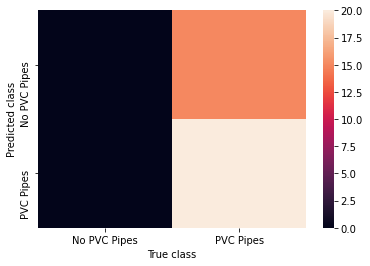

In [6]:
Test_datagen = ImageDataGenerator(rescale = 1./255)
Test_set = Test_datagen.flow_from_directory('C:/Users/HP/Desktop/Images/Test',
                                                 batch_size = 50,
                                                 target_size = (150,150),
                                                 class_mode = 'binary')

test_inputs,test_targets = next(iter(Test_set))

_,accuracy = model_cnn.evaluate(test_inputs,test_targets)
print(f'Accuracy based on Test data is {accuracy*100:.2f}%')

test_pred_raw = model_cnn.predict(test_inputs)
test_pred = []
for i in range(test_pred_raw.shape[0]):
    if test_pred_raw[0][0] < 0.5:
        test_pred.append(0)
    else:
        test_pred.append(1)
test_pred = np.asarray(test_pred)

cm = confusion_matrix(test_targets, test_pred)

print(cm)

sns.heatmap(cm,xticklabels=['No PVC Pipes','PVC Pipes'],yticklabels=['No PVC Pipes','PVC Pipes'])
plt.xlabel('True class')
plt.ylabel('Predicted class')

# Model Testing with Test Images

AxesImage(54,36;334.8x217.44)
[[0.99993527]]
PVC Pipes


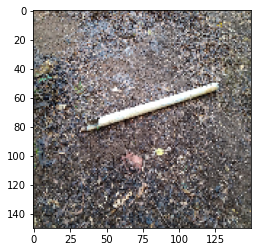

In [8]:
from keras.preprocessing import image
image_1 = 'C:/Users/HP/Downloads/PVC Pipe_1.jpg'
test_image = image.load_img(image_1,target_size = (150,150))
test_image = image.img_to_array(test_image)
test_image = test_image/255
print(plt.imshow(test_image))
test_image = np.expand_dims(test_image, axis = 0)
result = model_cnn.predict(test_image)
print(result)
if result[0][0] < 0.5:
    prediction = 'No Pipes'
else:
    prediction = 'PVC Pipes'
print(prediction)

AxesImage(54,36;334.8x217.44)
[[0.91705036]]
PVC Pipes


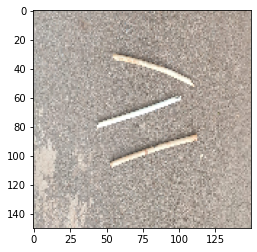

In [18]:
from keras.preprocessing import image
image_2 = 'C:/Users/HP/Downloads/PVC Pipe_2.jpeg'
test_image = image.load_img(image_2,target_size = (150,150))
test_image = image.img_to_array(test_image)
test_image = test_image/255
print(plt.imshow(test_image))
test_image = np.expand_dims(test_image, axis = 0)
result = model_cnn.predict(test_image)
print(result)
if result[0][0] < 0.5:
    prediction = 'No Pipes'
else:
    prediction = 'PVC Pipes'
print(prediction)

AxesImage(54,36;334.8x217.44)
[[0.30393183]]
No Pipes


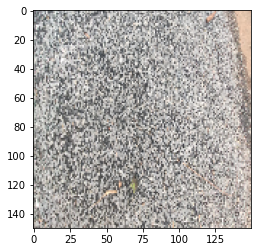

In [20]:
image_3 = 'C:/Users/HP/Downloads/No Pipe_1.jpeg'
test_image = image.load_img(image_3,target_size = (150,150))
test_image = image.img_to_array(test_image)
test_image = test_image/255
print(plt.imshow(test_image))
test_image = np.expand_dims(test_image, axis = 0)
result = model_cnn.predict(test_image)
print(result)
if result[0][0] < 0.5:
    prediction = 'No Pipes'
else:
    prediction = 'PVC Pipes'
print(prediction)

AxesImage(54,36;334.8x217.44)
[[0.334054]]
No Pipes


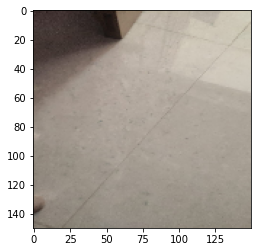

In [21]:
image_4 = 'C:/Users/HP/Downloads/No Pipe_2.jpeg'
test_image = image.load_img(image_4,target_size = (150,150))
test_image = image.img_to_array(test_image)
test_image = test_image/255
print(plt.imshow(test_image))
test_image = np.expand_dims(test_image, axis = 0)
result = model_cnn.predict(test_image)
print(result)
if result[0][0] < 0.5:
    prediction = 'No Pipes'
else:
    prediction = 'PVC Pipes'
print(prediction)

In [5]:
import numpy as np

In [7]:
arr = np.array([1,2])

In [8]:
arr

array([1, 2])

In [9]:
arr2 = np.array([3,4])

In [12]:
arr3 = np.array(arr,arr2)

TypeError: Cannot construct a dtype from an array

In [11]:
arr3

array([[1, 2],
       [3, 4]])